In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from tensorflow.keras.utils import to_categorical
from scipy.stats import linregress

2022-10-08 09:54:40.361001: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df_list = pd.read_csv("Resources/cleandata/clean_listings.csv")
df_list.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0
1,953595,Seattle,WA,98119,47.639123,-122.365666,4,1.0,1.0,1.0,150,96.0
2,3308979,Seattle,WA,98119,47.629724,-122.369483,11,4.5,5.0,7.0,975,97.0
3,278830,Seattle,WA,98119,47.632918,-122.372471,6,2.0,3.0,3.0,450,92.0
4,5956968,Seattle,WA,98119,47.630525,-122.366174,2,1.0,1.0,1.0,120,95.0


In [3]:
df_cal = pd.read_csv("Resources/cleandata/clean_calendar.csv")
df_cal.head()

,listing_id,date,available,price
0,241032,1,t,85
1,241032,1,t,85
2,241032,1,t,85
3,241032,1,t,85
4,241032,1,t,85


In [4]:
df_cal_g = df_cal.groupby(['listing_id','date']).mean()
df_cal_g

price
listing_id date       
3335       1     120.0
           2     120.0
           3     120.0
           4     120.0
           5     120.0
...                ...
10340165   8      43.0
           9      43.0
           10     43.0
           11     43.0
           12     43.0

[33939 rows x 1 columns]

In [5]:
df_cal_g = df_cal_g.reset_index(level=['date'])
df_cal_g.head()

,date,price
listing_id,,
3335,1,120.0
3335,2,120.0
3335,3,120.0
3335,4,120.0
3335,5,120.0


In [6]:
df = df_list.merge(df_cal_g, how='inner', on='listing_id')
df.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price_x,review_scores_rating,date,price_y
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,1,85.0
1,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,2,85.0
2,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,3,85.0
3,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,4,85.0
4,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,5,85.0


In [7]:
df.rename(columns={"price_y":'price','date':'month'}, inplace=True)
df.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price_x,review_scores_rating,month,price
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,1,85.0
1,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,2,85.0
2,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,3,85.0
3,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,4,85.0
4,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,5,85.0


In [8]:
df.drop(columns=['state','listing_id','price_x'], inplace=True)

In [9]:
df.head()

,city,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating,month,price
0,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,1,85.0
1,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,2,85.0
2,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,3,85.0
3,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,4,85.0
4,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,5,85.0


In [10]:
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(df[['city','zipcode','month']]))
encode_df.columns = enc.get_feature_names(['city','zipcode','month'])

/Users/johnwhendricks/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
df = df.merge(encode_df, left_index=True, right_index=True)
df.drop(columns=['city','zipcode','month'], inplace=True)

In [12]:
df.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating,price,"city_Ballard, Seattle",city_Phinney Ridge Seattle,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,85.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X = df.drop(columns=['price'])
y = df['price']

In [14]:
print(X.shape)
print(y.shape)

(28453, 53)
(28453,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
X_train_scaled

array([[ 0.68178422,  0.47605678,  0.31365292, ..., -0.2951542 ,
        -0.29665275,  3.36141867],
       [-0.22386138, -0.46455405, -0.18337958, ..., -0.2951542 ,
        -0.29665275, -0.29749344],
       [ 1.14261569, -1.56982401, -0.68041209, ..., -0.2951542 ,
        -0.29665275, -0.29749344],
       ...,
       [-0.3407018 ,  0.22361676, -0.68041209, ..., -0.2951542 ,
        -0.29665275, -0.29749344],
       [ 0.81304451,  0.93146331,  0.31365292, ...,  3.38805953,
        -0.29665275, -0.29749344],
       [-0.41046352,  0.61000324,  0.31365292, ..., -0.2951542 ,
        -0.29665275, -0.29749344]])

In [18]:
y_train

5975      95.000000
8653     125.000000
22076     82.758621
25074     53.870968
17126     70.000000
            ...    
24980     87.000000
26399    122.000000
12507    260.000000
5481     112.903226
6997     123.870968
Name: price, Length: 21339, dtype: float64

In [89]:
input_dim = X.shape[1]

model = Sequential([
    Dense(200, input_dim = input_dim, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
#     Dense(50, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 200)               10800     
                                                                 
 dense_14 (Dense)            (None, 100)               20100     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 41,101
Trainable params: 41,101
Non-trainable params: 0
_________________________________________________________________


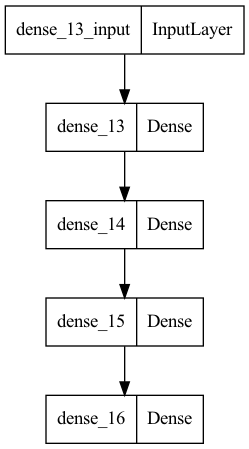

In [90]:
tf.keras.utils.plot_model(model)

In [91]:
model.compile(optimizer='adam',loss='mse')

In [92]:
model.fit(X_train_scaled, y_train, epochs=300)

Epoch 1/300
667/667 [==============================] - 1s 1ms/step - loss: 5801.7544
Epoch 2/300
667/667 [==============================] - 1s 1ms/step - loss: 3847.3083
Epoch 3/300
667/667 [==============================] - 1s 1ms/step - loss: 3681.4805
Epoch 4/300
667/667 [==============================] - 1s 1ms/step - loss: 3568.4431
Epoch 5/300
667/667 [==============================] - 1s 1ms/step - loss: 3455.8962
Epoch 6/300
667/667 [==============================] - 1s 1ms/step - loss: 3333.0007
Epoch 7/300
667/667 [==============================] - 1s 1ms/step - loss: 3250.8040
Epoch 8/300
667/667 [==============================] - 1s 1ms/step - loss: 3088.9780
Epoch 9/300
667/667 [==============================] - 1s 1ms/step - loss: 2973.7334
Epoch 10/300
667/667 [==============================] - 1s 1ms/step - loss: 2869.3450
Epoch 11/300
667/667 [==============================] - 1s 1ms/step - loss: 2770.7039
Epoch 12/300
667/667 [==============================] - 1s 1ms/

667/667 [==============================] - 1s 1ms/step - loss: 576.5275
Epoch 97/300
667/667 [==============================] - 1s 1ms/step - loss: 621.5809
Epoch 98/300
667/667 [==============================] - 1s 1ms/step - loss: 611.1918
Epoch 99/300
667/667 [==============================] - 1s 1ms/step - loss: 547.0806
Epoch 100/300
667/667 [==============================] - 1s 1ms/step - loss: 554.7963
Epoch 101/300
667/667 [==============================] - 1s 1ms/step - loss: 568.4857
Epoch 102/300
667/667 [==============================] - 1s 1ms/step - loss: 574.9790
Epoch 103/300
667/667 [==============================] - 1s 1ms/step - loss: 572.7800
Epoch 104/300
667/667 [==============================] - 1s 1ms/step - loss: 553.7319
Epoch 105/300
667/667 [==============================] - 1s 1ms/step - loss: 541.9805
Epoch 106/300
667/667 [==============================] - 1s 1ms/step - loss: 538.4046
Epoch 107/300
667/667 [==============================] - 1s 1ms/step - 

667/667 [==============================] - 1s 1ms/step - loss: 285.9169
Epoch 192/300
667/667 [==============================] - 1s 1ms/step - loss: 282.7466
Epoch 193/300
667/667 [==============================] - 1s 1ms/step - loss: 283.4495
Epoch 194/300
667/667 [==============================] - 1s 1ms/step - loss: 274.8430
Epoch 195/300
667/667 [==============================] - 1s 1ms/step - loss: 287.5202
Epoch 196/300
667/667 [==============================] - 1s 1ms/step - loss: 297.5154
Epoch 197/300
667/667 [==============================] - 1s 1ms/step - loss: 267.0578
Epoch 198/300
667/667 [==============================] - 1s 1ms/step - loss: 271.0074
Epoch 199/300
667/667 [==============================] - 1s 1ms/step - loss: 285.7173
Epoch 200/300
667/667 [==============================] - 1s 1ms/step - loss: 288.3215
Epoch 201/300
667/667 [==============================] - 1s 1ms/step - loss: 270.6872
Epoch 202/300
667/667 [==============================] - 1s 1ms/step

667/667 [==============================] - 1s 1ms/step - loss: 183.4820
Epoch 287/300
667/667 [==============================] - 1s 1ms/step - loss: 198.6935
Epoch 288/300
667/667 [==============================] - 1s 1ms/step - loss: 192.2985
Epoch 289/300
667/667 [==============================] - 1s 1ms/step - loss: 197.4855
Epoch 290/300
667/667 [==============================] - 1s 1ms/step - loss: 181.7379
Epoch 291/300
667/667 [==============================] - 1s 1ms/step - loss: 182.6939
Epoch 292/300
667/667 [==============================] - 1s 1ms/step - loss: 208.9866
Epoch 293/300
667/667 [==============================] - 1s 1ms/step - loss: 179.3357
Epoch 294/300
667/667 [==============================] - 1s 1ms/step - loss: 178.9615
Epoch 295/300
667/667 [==============================] - 1s 1ms/step - loss: 178.0147
Epoch 296/300
667/667 [==============================] - 1s 1ms/step - loss: 182.8192
Epoch 297/300
667/667 [==============================] - 1s 1ms/step

In [93]:
y_pred = model.predict(X_test_scaled)

223/223 [==============================] - 0s 881us/step


Text(0.5, 0, 'predicted price')

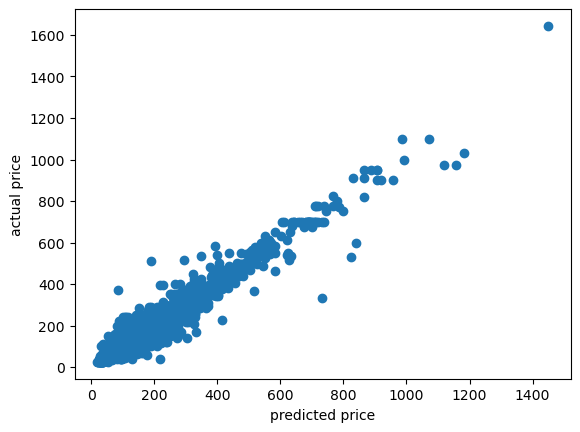

In [94]:
plt.scatter(y_pred, y_test)
plt.ylabel('actual price')
plt.xlabel('predicted price')

In [95]:
y_pred.tolist()

[[52.53408432006836],
 [76.28758239746094],
 [159.92147827148438],
 [174.3028564453125],
 [267.2825012207031],
 [141.88499450683594],
 [101.23689270019531],
 [267.8869323730469],
 [224.71336364746094],
 [138.4104461669922],
 [260.75286865234375],
 [98.027587890625],
 [98.0545425415039],
 [103.2698974609375],
 [36.971736907958984],
 [101.64735412597656],
 [56.37510299682617],
 [90.64437866210938],
 [88.60566711425781],
 [106.80290222167969],
 [132.23654174804688],
 [407.1990051269531],
 [257.38519287109375],
 [101.28843688964844],
 [91.74334716796875],
 [87.84928131103516],
 [97.0203628540039],
 [120.49861145019531],
 [83.74484252929688],
 [146.8313751220703],
 [432.9523620605469],
 [105.39144897460938],
 [143.71925354003906],
 [96.65679931640625],
 [416.6483459472656],
 [61.774295806884766],
 [126.86701202392578],
 [93.64287567138672],
 [130.5617218017578],
 [86.50048828125],
 [48.05942153930664],
 [145.59559631347656],
 [108.1451644897461],
 [69.35786437988281],
 [106.45632934570312],

In [96]:
y_test.values.tolist()

[46.666666666666664,
 85.0,
 125.0,
 175.0,
 258.5,
 125.0,
 104.0,
 250.0,
 283.3333333333333,
 172.1290322580645,
 264.8709677419355,
 100.0,
 84.0,
 80.0,
 35.0,
 85.0,
 65.0,
 114.35483870967742,
 90.0,
 88.0,
 141.4516129032258,
 381.6666666666667,
 276.0,
 107.48275862068965,
 92.0,
 90.0,
 95.0,
 116.45161290322581,
 72.74193548387096,
 150.0,
 448.38709677419354,
 99.0,
 127.16129032258064,
 100.0,
 403.3333333333333,
 65.0,
 105.0,
 110.0,
 140.0,
 82.2,
 61.42857142857143,
 127.58620689655173,
 95.0,
 60.0,
 101.0,
 150.0,
 142.5,
 75.0,
 83.9,
 292.64516129032256,
 117.0,
 95.0,
 91.61290322580645,
 150.0,
 167.85714285714286,
 150.0,
 200.0,
 169.0,
 65.0,
 167.66666666666666,
 84.0,
 58.86666666666667,
 138.70967741935485,
 204.54545454545453,
 150.52,
 90.0,
 146.93333333333334,
 172.0,
 162.2258064516129,
 56.0,
 170.80645161290323,
 42.0,
 167.06451612903226,
 125.0,
 78.0,
 156.4516129032258,
 55.0,
 78.87096774193549,
 101.29032258064517,
 175.1,
 189.0,
 121.48148148

In [97]:
results_df = pd.DataFrame({'predicted price':y_pred[:,0]})
results_df.head()

,predicted price
0,52.534084
1,76.287582
2,159.921478
3,174.302856
4,267.282501


In [98]:
results_df['actual price'] = y_test.values

In [99]:
results_df.head(20)

,predicted price,actual price
0,52.534084,46.666667
1,76.287582,85.000000
2,159.921478,125.000000
3,174.302856,175.000000
4,267.282501,258.500000
5,141.884995,125.000000
6,101.236893,104.000000
7,267.886932,250.000000
8,224.713364,283.333333
9,138.410446,172.129032


In [100]:
_, _, r_value, _, _ = linregress(results_df['predicted price'].values,results_df['actual price'].values)

In [101]:
print('r value:',r_value)

r value: 0.969639901074083
